# **1. Entendimiento del Negocio**

Comañia del sector textil con actividades manuales, quiere medir la productividad de sus empleados, quiere estimar los niveles de productividad de sus empleados apra mejorar la operación y mantener los ingresos esperados, ademas identificar herramientas para mejroar el día a día de sus empleados 


# **2. Enfoque Analítico**

Construir un modelo de regresión para predecir la productividad de cada empleado con un MAPE menor al 20% (productividad > 80%)

# **3. Requerimiento de Datos**

- Datos del trabajador en su puesto de trabajo 
- Datos de medida de trabajo (tiempos, # prendas, momentos de ocio, cantidad personas)
- Datos de prudctividad (supervisado)


# **4. Recolección de los Datos**

- Date: Fecha medición
- Quarter: Trimestre medición
- Dept: Area de trabajo
- Day: Nombre del día de trabajo 
- Team: # del equipo del trabajo 
- Target_Productivity: Productividad objetivo del área d trabajo 
- SMV: Valor tiempo std en minutos de una actividad
- Wip: Cantidad de trabajo en proceso (unidades)
- Overtime: Tiempo de operación 
- Incentive: Porcentaje incentivos al área de trabajo 
- idle_time: Tiempo de parada
- idle_men: hombres quietos en el tiempo de parada
- no_of_style_change: Cantidad de cambios de estlo en prod
- no_of_workers: Cantidad total de trabajadores'
- actual_productivity: Productividad real (Y)


In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as mso
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('Datos/garments_worker_productivity.csv')
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


# **5. Entendimiento de los datos**

- Datos nulos
- Estadísticas univariada, bivariada y multivariada
- Desbalance de y

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

<Axes: >

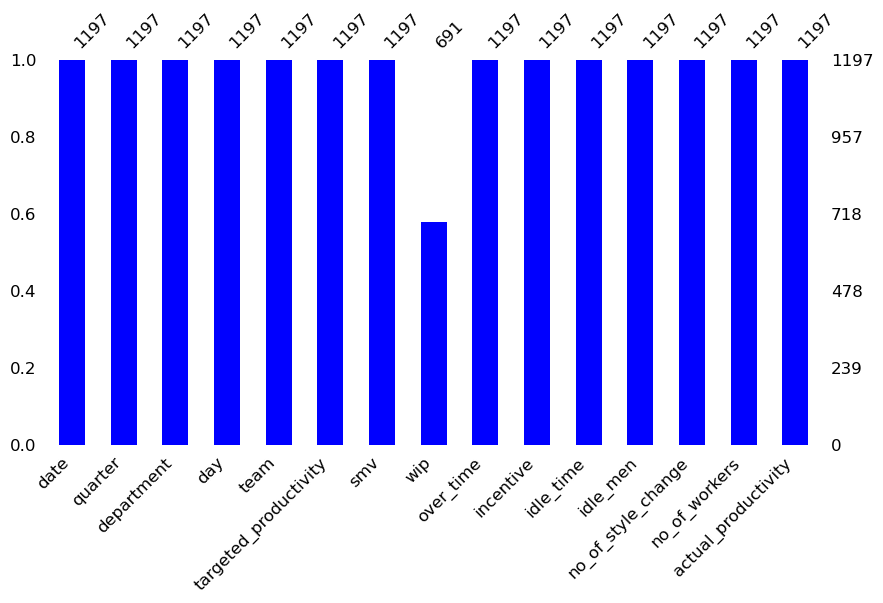

In [10]:
mso.bar(data, color='blue', figsize=(10, 5), fontsize=12)

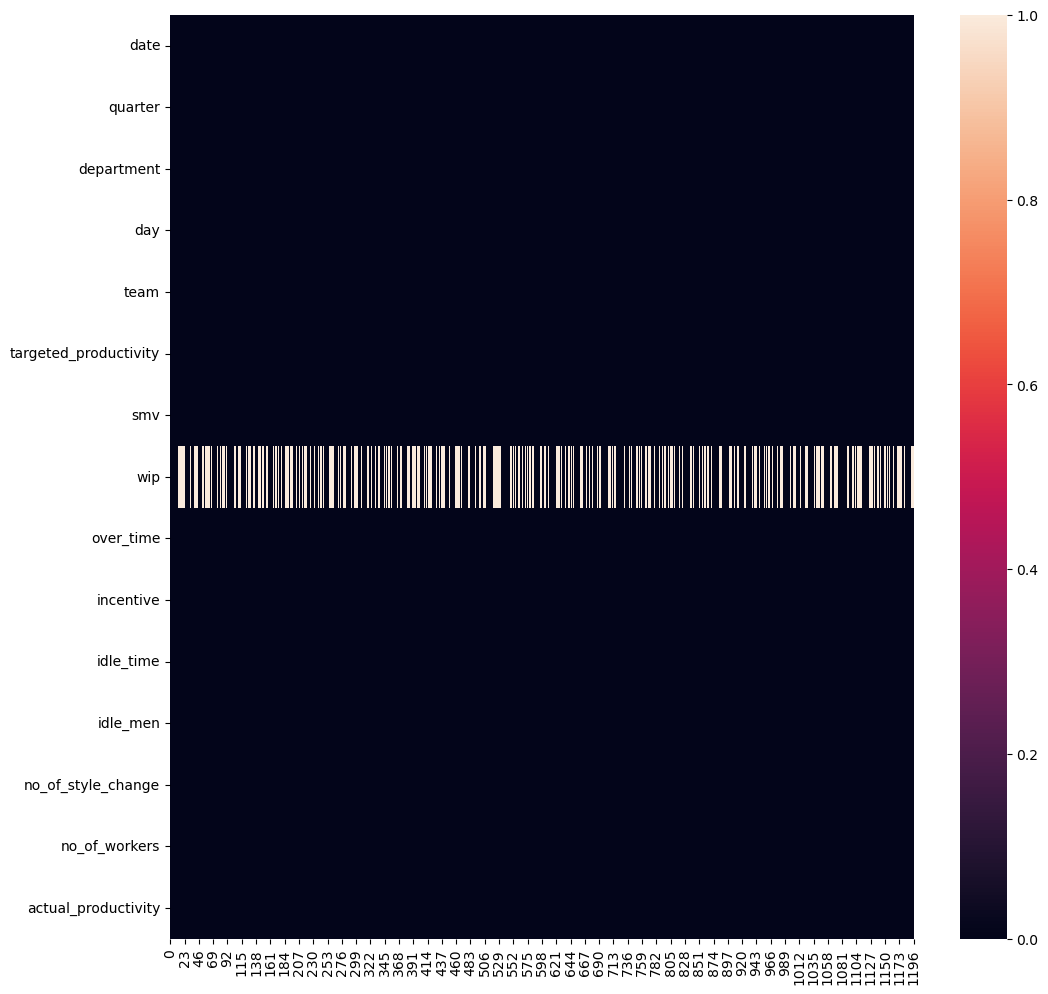

In [11]:
plt.figure(figsize = (12, 12))
data.isnull().transpose().pipe(lambda df: sb.heatmap(data = df))
plt.show()

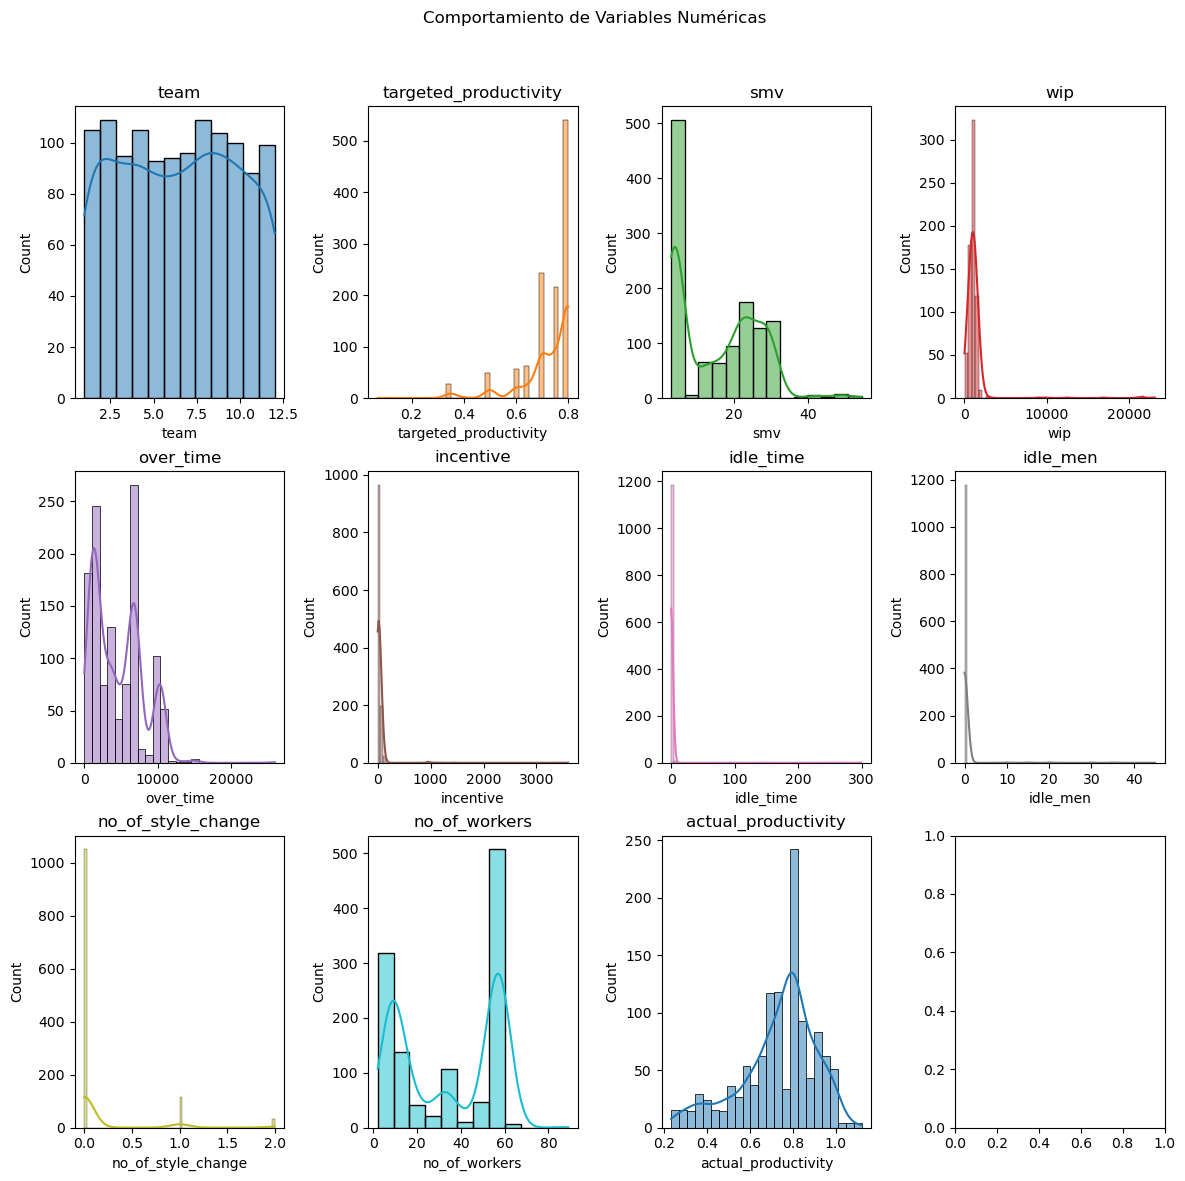

In [13]:
#Exploración univariada de los datos
##Para datos numéricos: histogramas de frecuencia
##Para datos categóricos: gráficos de torta

###HISTOGRAMAS DE FRECUENCIA
fig, ax = plt.subplots(3, 4, figsize = (12, 12))
ax = ax.flat
num_col = data.select_dtypes(include = ['int64', 'float64']).columns
for i, col in enumerate(num_col):
    sb.histplot(data = data, x = col, 
                kde = True, color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'], ax = ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Numéricas')
plt.show()


- multimodales no parametricas son las que so cuadradas/uniformes con varias modas
- Las vaeiables con huecos se pueden ver que es por ser valores enteros 0-5, 1-10, etc
- Sería muy raro tener un comportamiento diferente en las variables de tiempo, por ejemplo entre time on social o time gaming en relación a time total usage
- La edad puede que no nos aparte mucha información pero nos ayuda a controlar el modelo 
- El Id no nos sirve 

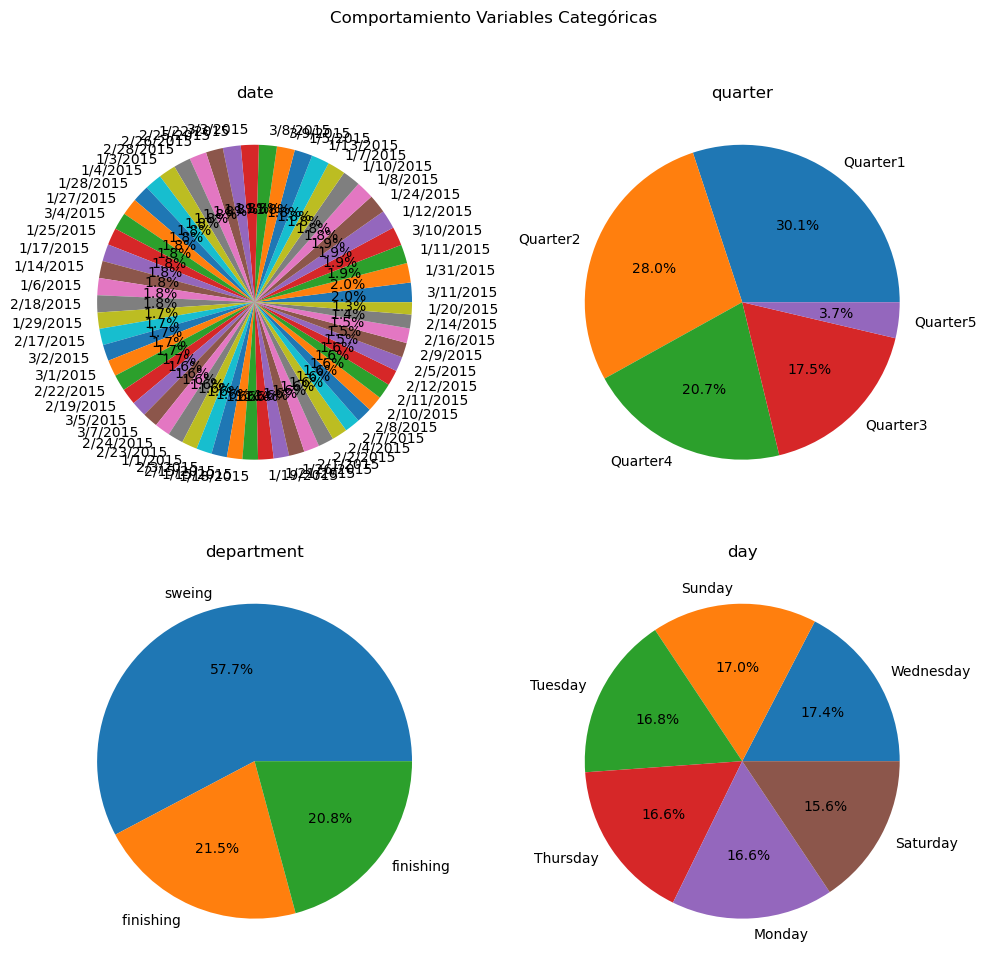

In [18]:
##GRÁFICOS DE TORTA

fig, ax = plt.subplots(2, 2, figsize = (10, 10))
ax = ax.flat
cat_col = data.select_dtypes(include = ['object']).columns
for i, col in enumerate(cat_col):
    ax[i].pie(x = data[col].value_counts(), labels = data[col].value_counts().index, autopct = '%0.1f%%')
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle("Comportamiento Variables Categóricas")
plt.show()

# **6. Preparación de los Datos**

- Eliminar variables que no son significativas
- Completar variables que cuentan con datos nulos
- Transformar los datos para que sean usables por el modelo
- Separar en conjuntos de entrenamiento y prueba


- Completaremos las entradas con campos nulos primero la simple y luego por modelo
- simple tiene dos formas, constante(valor fijo) o por medidas de tendencia central(dependen de la var)
pd.fillna
  - Si la var es numerica imputamos por media o mediana 
  - La media se ve sesgada por valores extremos 
  - La mediana es posicional
  - Si es categorica imputamos por moda 
LA IMPUTACION CON MTC PUEDEN ENGAÑAR AL MODELO OJO
- Modelo(regresión, para las cat debemos codificar y descodificar)
  - Vecindad: Se completan con la media de los n vecinos del nulo
  - Recursivo: Imputación por medida de tendecia central inicialmente, luego elije una columna a completar, vuelve a poner el nulo y recalcula con un nuevo modelo para completar el nulo de esa columna, luego sigue con las otras, dentro del recursivo funcionan bien la regresiones lineales pero el mejro en terminos de presición son los randomForest 

Transformar de manera ordinal las variables categoricas 


In [19]:
import sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
catCol = data.select_dtypes(include = ['object']).columns
categorical_transformer = make_column_transformer((OrdinalEncoder(), catCol), remainder = 'passthrough')
categorical_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 Index(['date', 'quarter', 'department', 'day'], dtype='object'))])

In [21]:
data_transofrmed = pd.DataFrame(categorical_transformer.fit_transform(data),
             columns = categorical_transformer.get_feature_names_out(),
             index = data.index).rename(columns= lambda x: x.removeprefix('ordinalencoder__')).rename(columns= lambda x: x.removeprefix('remainder__'))

In [27]:
# Imputación de recursiva 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# recursive_imputer = IterativeImputer(estimator = RandomForestRegressor(n_estimators = 100, random_state = 42)


recursive_imputer = IterativeImputer(estimator = LinearRegression(),
                                                    initial_strategy = 'mean',
                                                    max_iter = 10)
data_recursive_df = pd.DataFrame(recursive_imputer.fit_transform(data_transofrmed),
             columns = data_transofrmed.columns,
             index = data_transofrmed.index)

data_recursive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   float64
 1   quarter                1197 non-null   float64
 2   department             1197 non-null   float64
 3   day                    1197 non-null   float64
 4   team                   1197 non-null   float64
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   float64
 9   incentive              1197 non-null   float64
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   float64
 12  no_of_style_change     1197 non-null   float64
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

<Axes: >

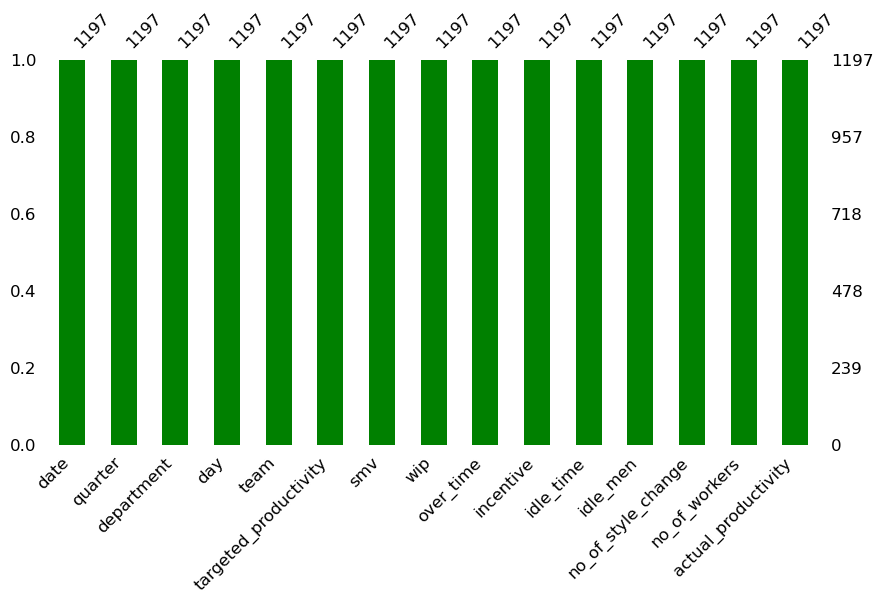

In [28]:
mso.bar(data_recursive_df, color='green', figsize=(10, 5), fontsize=12)

#### Devolvemos de la codificación a las variables originales 

In [24]:
data_imputed  = data_recursive_df.copy()
data_imputed[catCol] = (categorical_transformer.named_transformers_.ordinalencoder.inverse_transform(X= data_recursive_df[catCol]))
data_imputed

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8.0,0.80,26.16,1108.000000,7080.0,98.0,0.0,0.0,0.0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1.0,0.75,3.94,486.815132,960.0,0.0,0.0,0.0,0.0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11.0,0.80,11.41,968.000000,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12.0,0.80,11.41,968.000000,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6.0,0.80,25.90,1170.000000,1920.0,50.0,0.0,0.0,0.0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10.0,0.75,2.90,169.276879,960.0,0.0,0.0,0.0,0.0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8.0,0.70,3.90,183.427915,960.0,0.0,0.0,0.0,0.0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7.0,0.65,3.90,205.883842,960.0,0.0,0.0,0.0,0.0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9.0,0.75,2.90,283.776115,1800.0,0.0,0.0,0.0,0.0,15.0,0.505889


#### Tansformaciones

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

num_col = X.select_dtypes(include = ['int64', 'float64']).columns.to_list()
cat_col = X.select_dtypes(include = ['object']).columns.to_list()


num_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])
categorical_transformer = Pipeline( steps = [('encoder', OneHotEncoder())])
preprocessor = ColumnTransformer(transformers = [('num', num_transformer, num_col),
                                                  ('cat', categorical_transformer, cat_col)])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Daily_Usage_Hours', 'Sleep_Hours',
                                  'Academic_Performance', 'Social_Interactions',
                                  'Exercise_Hours', 'Anxiety_Level',
                                  'Depression_Level', 'Self_Esteem',
                                  'Parental_Control', 'Screen_Time_Before_Bed',
                                  'Phone_Checks_Per_Day', 'Apps_Used_Daily',
                                  'Time_on_Social_Media', 'Time_on_Gaming',
                                  'Time_on_Education', 'Family_Communication',
                                  'Weekend_Usage_Hours']),
                                ('cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['Gender', 'School_Grade',
                                  'Phone_Usage_Purpose'])])

In [15]:
x_pre = preprocessor.fit_transform(X)
codCat = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_col)
labels = np.concatenate([num_col, codCat])
x_pro  = pd.DataFrame(x_pre, columns = labels)
x_pro.head()

,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours,Gender_Female,Gender_Male,Gender_Other,School_Grade_10th,School_Grade_11th,School_Grade_12th,School_Grade_7th,School_Grade_8th,School_Grade_9th,Phone_Usage_Purpose_Browsing,Phone_Usage_Purpose_Education,Phone_Usage_Purpose_Gaming,Phone_Usage_Purpose_Other,Phone_Usage_Purpose_Social Media
0,0.347826,0.442857,0.56,0.5,0.025,1.000000,0.222222,0.777778,0.000000,0.538462,0.507692,0.933333,0.72,0.425,0.400000,0.333333,0.621429,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.478261,0.500000,0.40,0.5,0.000,0.222222,0.666667,0.222222,0.000000,0.346154,0.584615,0.266667,0.22,1.000,0.600000,0.111111,0.378571,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.504348,0.357143,0.86,0.8,0.200,0.111111,0.222222,1.000000,0.502943,0.192308,0.900000,0.200000,0.06,0.375,0.133333,0.555556,0.407143,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.269565,0.128571,0.56,0.8,0.400,0.888889,1.000000,0.222222,0.000000,0.538462,0.830769,0.133333,0.62,0.400,0.266667,0.777778,0.214286,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.217391,0.528571,0.12,0.4,0.275,0.000000,0.444444,0.000000,0.000000,0.384615,0.584615,1.000000,0.52,0.225,0.366667,1.000000,0.264286,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


##### **Separamos el df para el entrenamiento**

el tamaño de X_train es: (5363, 31), el tamaño de X_test es: (2299, 31)
el tamaño de y_train es: (5363, 1), el tamaño de y_test es: (2299, 1)


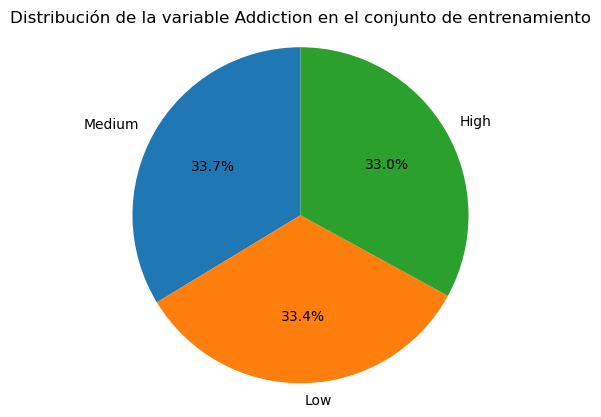

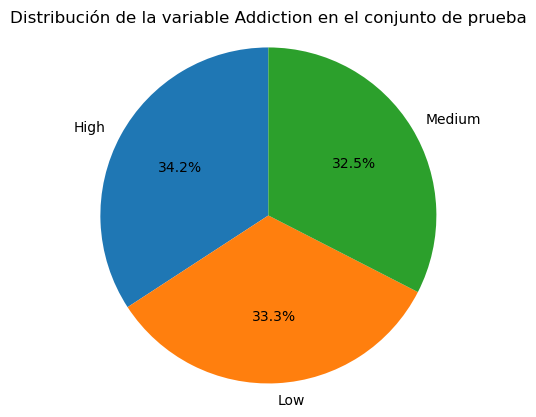

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_pro, y, test_size=0.3, random_state=123)

print(f'el tamaño de X_train es: {X_train.shape}, el tamaño de X_test es: {X_test.shape}')
print(f'el tamaño de y_train es: {Y_train.shape}, el tamaño de y_test es: {Y_test.shape}')

plt.pie(x = Y_train['Addiction'].value_counts(),
        labels = Y_train['Addiction'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90)
plt.axis('equal')
plt.title('Distribución de la variable Addiction en el conjunto de entrenamiento')
plt.show()

plt.pie(x = Y_test['Addiction'].value_counts(),
        labels = Y_test['Addiction'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90)
plt.axis('equal')
plt.title('Distribución de la variable Addiction en el conjunto de prueba')
plt.show()


# 7. Modelos De Clasificación 
 - RegLogistica
 - K vecinos más cercanos 
 - Naive bayes
 - Máquinas de soporte vectorial 
 - Arboles de decisión 
 - Random Forest 
 - Adaptative boosting 
 - Gradient boosting 
 - Redes Neuronales percepción multicapa 

 **Busqueda de híperparametros con validación cruzada**
 Queremos evitar el sobreajuste  
 Los modelos pueden estar en tres estados  
 - Ajustado
    - Cuando el desempeño de entrenamiento y validaión son similares y cercanos a 1 (acuraccy)
 - SubAjustado
   -  Cuando el desempeño de entrenamiento y validaión son similares y cercanos a 0
 - SobreAjustado
    -  Cuando el desempeño de entrenamiento es mucho mayor que el de validaión, (20%)  

**El desempeño de clasificación**
- Matriz de confusión  (VP, VN, FP, FN)
  0: positivo, 1: negativo
  VN + VP >> FP + FN  
- Accuracy: Verdades totales / Total
- Precisión: VP / VP + FN :  Vp en relación a los falsos negativos 
- Recall: VP / VP + FP:  Vp en relación a los falsos positivos

### RegLogistica
Tomamos una estimación lineal    
se mete en un humbral duro (función logistica)   
Se clasifican según la condición en dos grupos   
- El objetivo es encontrar los valores de alphai que minimicen el error de pronostico 
- Debemos hacer un proceso iterativo para encontrar un valor de error minimo para que alpha se acerque más al minimo global de costo
- Beta es la taza de aprenizaje, este es un valor real positivo, representa el tamaño del paso de estimación en cada iteración 
- Beta es el HÍPERPARAMETRO de la REGLOGISTICA

##### Metodos de busqueda de hiperparametros ####
**Exaustiva:** Crea tantos modelos como posibles combinaciones de los parametros y los ajusta todos (ácida mejor por exaustiva)
- La cantidad de modelos = * hiperparametros   

**Aleatoria:** Crea una muestra random de todos los posibles modelos construidos por la combinación de los hiperparametros (mejor por la velocidad mayor error)

**Busqueda con validación cruzada:**  
Parte Xtrain Ytrain en cierta cantidad de "folds" tendría que hacer la misma cantidad de experimentos que de folds donde se  
hacen combinaciones diferentes de los folds para cada experimento deben ser menos de 10 particiones o folds 
Con los folds minimizamos el sobreajuste, dentro del mismo entrenamiento se hacen validaciones 
Se eligen todos menos un fold para entrenar y verificamos con el restante, así hasta iterar todos, esto mejora el modelo 

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # metodos de busqueda de hiperparametros con validacion cruzada



In [ ]:
from sklearn.linear_model import LogisticRegression

# dejaremos saga como el metodo para encotnrar la gradiente ya que nos deja

model1 = LogisticRegression(solver = 'saga', random_state=123)
#si el mejor da en los limites debemos ampliar el rango, si están dos muy iguales investigamos ese rango
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]} 

clf_1 = GridSearchCV(estimator=model1, param_grid=param_grid, cv=5, scoring='accuracy') #cv: debe ser impar entero, f1 tiene en cuenta el acuracy y recall
clf_1.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=123, solver='saga'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                               1000.0],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

**Clasificacion multiclase**
- Uno vs uno:
- Uno vs todos:   

In [22]:
validacion = pd.concat([pd.DataFrame(clf_1.cv_results_['params']),
                        pd.DataFrame(clf_1.cv_results_['mean_test_score'], columns=['accuracy'])], axis=1)
validacion.sort_values(by='accuracy', ascending=False)

,C,penalty,accuracy
15,10.0000,l1,0.950401
18,100.0000,l1,0.950401
21,1000.0000,l1,0.950401
22,1000.0000,l2,0.950401
19,100.0000,l2,0.950400
12,1.0000,l1,0.946485
16,10.0000,l2,0.944807
13,1.0000,l2,0.920939
9,0.1000,l1,0.919822
10,0.1000,l2,0.878241


In [23]:
modelo_1_final= clf_1.best_estimator_
modelo_1_final

LogisticRegression(C=10.0, penalty='l1', random_state=123, solver='saga')

              precision    recall  f1-score   support

        High       0.99      0.98      0.98      1768
         Low       0.93      0.98      0.95      1789
      Medium       0.95      0.91      0.93      1806

    accuracy                           0.96      5363
   macro avg       0.96      0.96      0.96      5363
weighted avg       0.96      0.96      0.96      5363

[[1726    0   42]
 [   0 1747   42]
 [  14  141 1651]]


<Axes: >

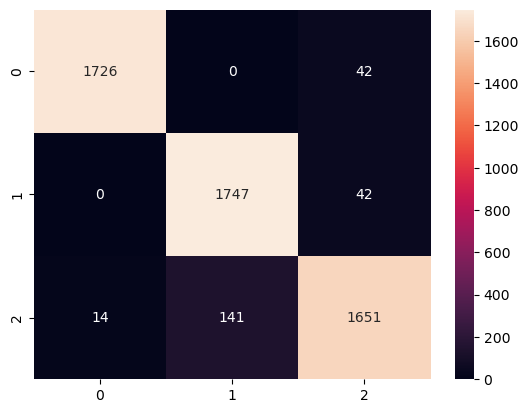

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_1_train = modelo_1_final.predict(X_train)


print(classification_report(Y_train, y_pred_1_train))
print(confusion_matrix(Y_train, y_pred_1_train))
sb.heatmap(confusion_matrix(Y_train, y_pred_1_train), annot=True, fmt='d')


              precision    recall  f1-score   support

        High       0.98      0.97      0.98       786
         Low       0.91      0.97      0.94       765
      Medium       0.94      0.88      0.91       748

    accuracy                           0.94      2299
   macro avg       0.94      0.94      0.94      2299
weighted avg       0.94      0.94      0.94      2299

[[761   0  25]
 [  0 745  20]
 [ 13  78 657]]


<Axes: >

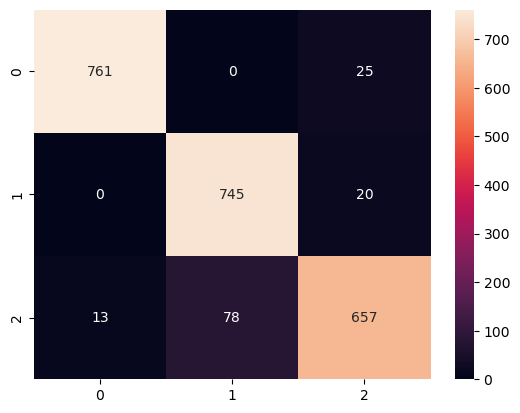

In [ ]:
y_pred_1_test = modelo_1_final.predict(X_test)

print(classification_report(Y_test, y_pred_1_test))
print(confusion_matrix(Y_test, y_pred_1_test))
sb.heatmap(confusion_matrix(Y_test, y_pred_1_test), annot=True, fmt='d')

# columnas prediccion, filas real 

### k-vecinos más cercanos 
- K: Cantidad de vecinos (tiene que ser impar)
- Distancica: Euclidicana o Manhatan

Asociarse a los k vecinos donde la distancia sea mínima 
K es un entero positivo 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

modelo_2 = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 19, 21, 53], 'p': [1, 2]} # 1 es manhattan y 2 es euclidiana
clf_2 = GridSearchCV(modelo_2, param_grid, cv=5, scoring='f1_weighted')
clf_2.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 19, 21, 53], 'p': [1, 2]},
             scoring='f1_weighted')

In [30]:
validacion = pd.concat([pd.DataFrame(clf_2.cv_results_['params']),
                        pd.DataFrame(clf_2.cv_results_['mean_test_score'], columns=['f1_weighted'])], axis=1)
validacion.sort_values(by='f1_weighted', ascending=False)

,n_neighbors,p,f1_weighted
0,3,1,0.877493
1,3,2,0.868857
2,5,1,0.823309
3,5,2,0.811825
4,7,1,0.791189
5,7,2,0.776492
6,19,1,0.748481
8,21,1,0.741902
7,19,2,0.703669
9,21,2,0.700328


In [31]:
modelo_2_final = clf_2.best_estimator_
modelo_2_final

KNeighborsClassifier(n_neighbors=3, p=1)

              precision    recall  f1-score   support

        High       0.99      0.86      0.92      1768
         Low       0.99      1.00      0.99      1789
      Medium       0.89      0.99      0.94      1806

    accuracy                           0.95      5363
   macro avg       0.96      0.95      0.95      5363
weighted avg       0.96      0.95      0.95      5363

[[1519   19  230]
 [   0 1789    0]
 [  11    1 1794]]


<Axes: >

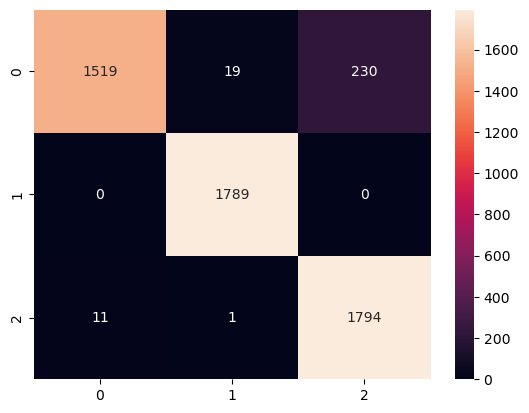

In [33]:
y_pred_2_train = modelo_2_final.predict(X_train)

print(classification_report(Y_train, y_pred_2_train))
print(confusion_matrix(Y_train, y_pred_2_train))
sb.heatmap(confusion_matrix(Y_train, y_pred_2_train), annot=True, fmt='d')


              precision    recall  f1-score   support

        High       0.97      0.75      0.84       786
         Low       0.98      1.00      0.99       765
      Medium       0.80      0.97      0.88       748

    accuracy                           0.90      2299
   macro avg       0.92      0.91      0.90      2299
weighted avg       0.92      0.90      0.90      2299

[[588  16 182]
 [  0 765   0]
 [ 20   1 727]]


<Axes: >

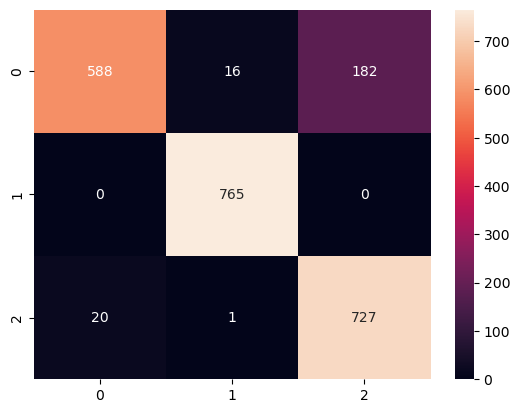

In [34]:
y_pred_2_test = modelo_2_final.predict(X_test)

print(classification_report(Y_test, y_pred_2_test))
print(confusion_matrix(Y_test, y_pred_2_test))
sb.heatmap(confusion_matrix(Y_test, y_pred_2_test), annot=True, fmt='d')

### Máquinas de soporte vectorial 

Traza una linea recta de separación de las clases, sobre esta linea se tiene un rango donde puede haber error
Es un modelo para problemas lineales, si no lo son, como comunmente pasa se debe hacer una transformación lineal para crear  
una nueva dim y poder crear una linea que si separe los datos correctamente -> KERNEL

Hiperparametros:
- C: real positivo, determina que tan grande es el rango de error (Eb)  
   Cuando tiende a 0 hay menor penalización al error   
   Cuando tiende a infinito hay mayor penalización, puede causar sobreajuste 

- KERNELS:  
   polynomial  1,2,3,4,5....
   gaussiano radial  
   laplaciano   
   Thin-plate spline (log)  
   Sigmoid (tanH)  



In [21]:
from sklearn.svm import SVC

modelo_3 = SVC(random_state= 123)

param_grid = {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'degree': [2, 3, 4]}

clf_3 = GridSearchCV(estimator=modelo_3, param_grid=param_grid, cv=5, scoring='f1_weighted')
clf_3.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=123),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='f1_weighted')

In [22]:
validation = pd.concat([pd.DataFrame(clf_3.cv_results_['params']),
                        pd.DataFrame(clf_3.cv_results_['mean_test_score'], columns=['f1_weighted'])], axis=1)
validation.sort_values(by='f1_weighted', ascending=False)

,C,degree,kernel,f1_weighted
54,10.000,3,poly,0.989365
66,100.000,3,poly,0.989365
49,10.000,2,rbf,0.989178
53,10.000,3,rbf,0.989178
57,10.000,4,rbf,0.989178
...,...,...,...,...
9,0.001,4,rbf,0.169668
7,0.001,3,sigmoid,0.169668
5,0.001,3,rbf,0.169668
3,0.001,2,sigmoid,0.169668


In [23]:
modelo_3_final = clf_3.best_estimator_
modelo_3_final

SVC(C=10.0, kernel='poly', random_state=123)

              precision    recall  f1-score   support

        High       1.00      1.00      1.00      1768
         Low       1.00      1.00      1.00      1789
      Medium       1.00      1.00      1.00      1806

    accuracy                           1.00      5363
   macro avg       1.00      1.00      1.00      5363
weighted avg       1.00      1.00      1.00      5363

[[1768    0    0]
 [   0 1789    0]
 [   0    0 1806]]


<Axes: >

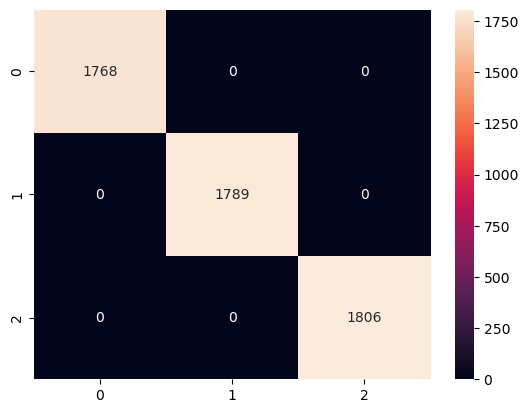

In [26]:
y_pred_3_train = modelo_3_final.predict(X_train)

print(classification_report(Y_train, y_pred_3_train))
print(confusion_matrix(Y_train, y_pred_3_train))
sb.heatmap(confusion_matrix(Y_train, y_pred_3_train), annot=True, fmt='d')


              precision    recall  f1-score   support

        High       1.00      0.96      0.98       786
         Low       1.00      1.00      1.00       765
      Medium       0.96      1.00      0.98       748

    accuracy                           0.99      2299
   macro avg       0.99      0.99      0.99      2299
weighted avg       0.99      0.99      0.99      2299

[[753   0  33]
 [  0 765   0]
 [  0   0 748]]


<Axes: >

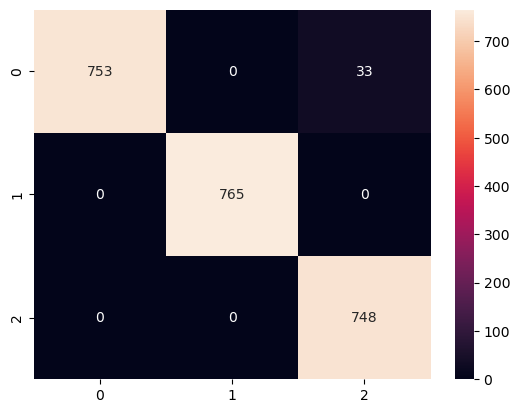

In [27]:
y_pred_3_test = modelo_3_final.predict(X_test)

print(classification_report(Y_test, y_pred_3_test))
print(confusion_matrix(Y_test, y_pred_3_test))
sb.heatmap(confusion_matrix(Y_test, y_pred_3_test), annot=True, fmt='d')


### Arboles de Decisión

Solamente ramifica en 2 ramas, se crean arboles puros, sus hojas cuentan con idividuos de una misma clase 
El proceso es de minimización de la probabilidad de que un individuo sea de otra clase 
En cada nodo se analiza una variable

Se basa en cada nodo en una función de impureza  
Pmk: La proporción de los individuos clase k en el nodo  

HIPERPARAMETROS:  
- Impureza:  
  Tasa de error max (Em) -> queremos que sea 0  (1-Pmk)  
  Genie (Gm) Es la sum del producto de exito o rechazo -> se espera que sea 0  (Pmk * (1 - Pmk))  
  Entropía (Dm) (Pmk * Log(Pmk))  
- Cantidad de hojas 





In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

modelo_4 = DecisionTreeClassifier(random_state=123)

param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': [None, 5, 10, 20],
              'min_samples_split': [2, 3, 4], # 
              'max_leaf_nodes': [None, 10, 20, 50]}

clf_4 = GridSearchCV(estimator=modelo_4, param_grid=param_grid, cv=3, scoring='f1_weighted') # cv tiene que ver con la complegidad 
clf_4.fit(X_train, Y_train) 

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 20],
                         'max_leaf_nodes': [None, 10, 20, 50],
                         'min_samples_split': [2, 3, 4]},
             scoring='f1_weighted')

In [29]:
validation = pd.concat([pd.DataFrame(clf_4.cv_results_['params']),
                        pd.DataFrame(clf_4.cv_results_['mean_test_score'], columns=['f1_weighted'])], axis=1)
validation.sort_values(by='f1_weighted', ascending=False)

,criterion,max_depth,max_leaf_nodes,min_samples_split,f1_weighted
96,log_loss,NaN,NaN,2,0.965802
48,entropy,NaN,NaN,2,0.965802
132,log_loss,20.0,NaN,2,0.965802
84,entropy,20.0,NaN,2,0.965802
85,entropy,20.0,NaN,3,0.965234
...,...,...,...,...,...
65,entropy,5.0,10.0,4,0.744224
64,entropy,5.0,10.0,3,0.744224
63,entropy,5.0,10.0,2,0.744224
111,log_loss,5.0,10.0,2,0.744224


In [30]:
modelo_4_final = clf_4.best_estimator_
modelo_4_final

DecisionTreeClassifier(criterion='entropy', random_state=123)

              precision    recall  f1-score   support

        High       1.00      1.00      1.00      1768
         Low       1.00      1.00      1.00      1789
      Medium       1.00      1.00      1.00      1806

    accuracy                           1.00      5363
   macro avg       1.00      1.00      1.00      5363
weighted avg       1.00      1.00      1.00      5363

[[1768    0    0]
 [   0 1789    0]
 [   0    0 1806]]


<Axes: >

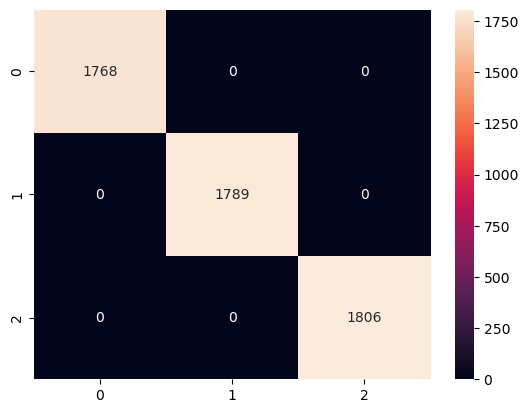

In [31]:
y_pred_4_train = modelo_4_final.predict(X_train)

print(classification_report(Y_train, y_pred_4_train))
print(confusion_matrix(Y_train, y_pred_4_train))
sb.heatmap(confusion_matrix(Y_train, y_pred_4_train), annot=True, fmt='d')

              precision    recall  f1-score   support

        High       1.00      0.93      0.96       786
         Low       1.00      1.00      1.00       765
      Medium       0.94      1.00      0.97       748

    accuracy                           0.98      2299
   macro avg       0.98      0.98      0.98      2299
weighted avg       0.98      0.98      0.98      2299

[[734   2  50]
 [  0 765   0]
 [  2   1 745]]


<Axes: >

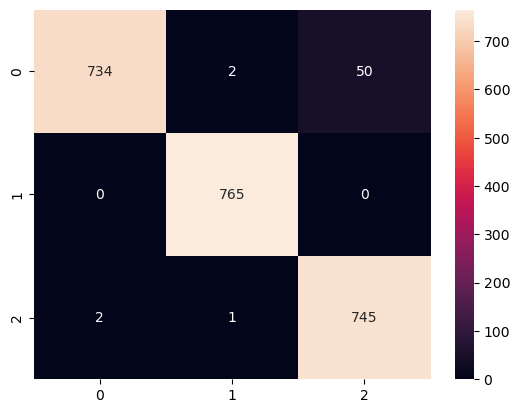

In [32]:
y_pred_4_test = modelo_4_final.predict(X_test)

print(classification_report(Y_test, y_pred_4_test))
print(confusion_matrix(Y_test, y_pred_4_test))
sb.heatmap(confusion_matrix(Y_test, y_pred_4_test), annot=True, fmt='d')

profundidad del arbol: 15
Num hojas: 156


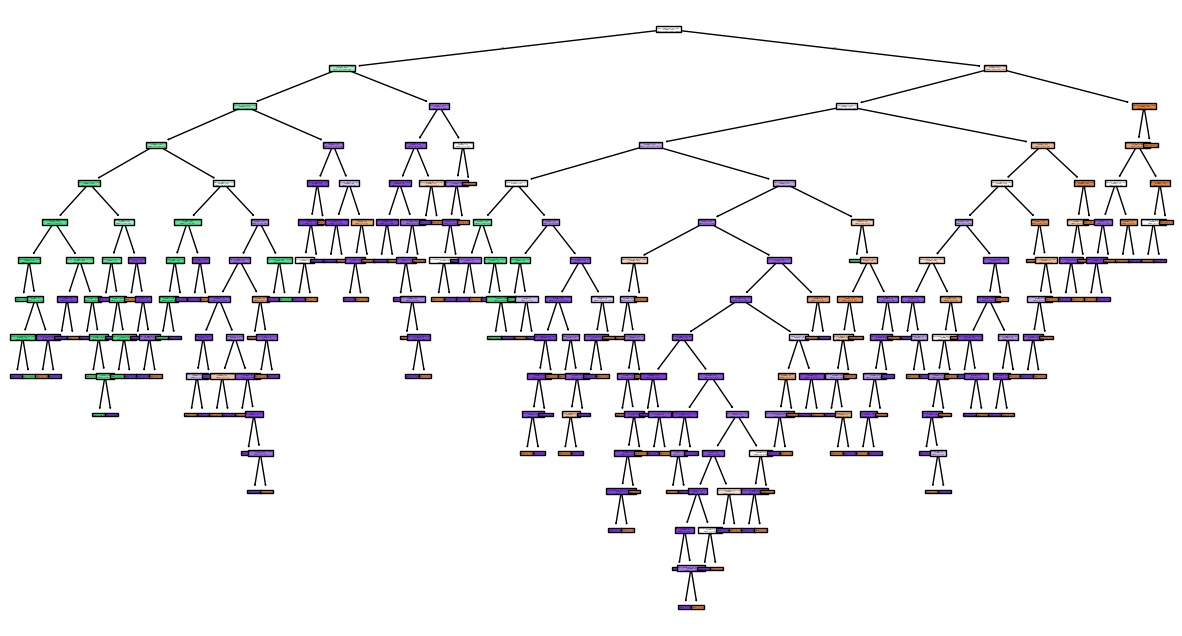

In [34]:
fig, ax = plt.subplots(figsize=(15, 8))
print(f'profundidad del arbol: {modelo_4_final.get_depth()}\nNum hojas: {modelo_4_final.get_n_leaves()}')
plot = plot_tree(modelo_4_final, filled=True, feature_names=labels,impurity= False, ax=ax)

### Modelos de ensamble

Conectar modelos existentes de bajo desempeño  

- Bagging (paralelo con bootsrap)  
  Separa el xtrain y ytrain en n cantidad de conjuntos, y para cada subconjunto ajusta un modelo   
  Se combinan las respuestas de los modelos y se combinan en una votación por moda  
  Representado por un random forest, el cual son n arboles en paralelo creando un Forest  

  hyper: iguales al arbol + n arboles   

- Boosting (Serie)  
  Toma un modelo y lo entrena con todos los datos, este modelo entrega predicciones y errores   
  Va a un modelo 2 donde entran las presddiciones, errores y datos  
  Ocurre lo mismo en el modelo 3  
  .
  n veces la respuesta final son las predicciones   

  Existe el adaptative boostin y gradient boosting   
  Manejan la entrada del error de diferente manera   
  Gradient: Le da el mismo peso a todos los arboles pero paso a paso se va ajustando los modelos con el error del anterior   
      XGboost  
      LGboost  
  Adaptative: Crea una variable nueva como el error y se usa en el próximo modelo sería una respuesta ponderada, le da pesos a cada arbol  

    hyper: iguales al arbol + n arboles  

  
  
- Stacking (Paralelo)  pueden ser modelos variados o usando el classifier solo uno  
  Igual que el bagging pero sin la separación de los datos   
  Votación por moda  

  Hyper: Los de cada modelo   



